# Investment Analysis Assignment

#### Aim:

To find the English Speaking Countries,the Funding type and top Sectors in which most investors are investing in a range of 5 to 15 million USD where Spark Funds can invest.

## Checkpoints - Part 1

In this section we are going to import the libraries and perform encoding and decoding operations so that we can use the columns as per our requirement and make the data consistent to perform the required operations.

In [163]:
#libraries Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import chardet
import warnings
#Setting warnings to be ignored
warnings.filterwarnings('ignore')

In [164]:
#Detecting the encoding type and storing them for futher usage
with open("companies.csv", 'rb') as rawdata:
    print("companies.csv encoding type is ", chardet.detect(rawdata.read(1000))['encoding'])
with open("rounds2.csv", 'rb') as rawdata:
    print("rounds2.csv encoding type is ",chardet.detect(rawdata.read(1000))['encoding'])
with open("mapping.csv", 'rb') as rawdata:
    print("mapping.csv encoding type is ",chardet.detect(rawdata.read(1000))['encoding'])

companies.csv encoding type is  ascii
rounds2.csv encoding type is  ascii
mapping.csv encoding type is  ascii


Although ascii is found to be encoding type , when i tried using this type , import was thorwing error
'ascii' codec can't decode byte 0xc2 in position 5648:. So, After some research using 'ISO-8859-1'.

In [165]:
#Create the required dataframes
companies = pd.read_csv("companies.csv",encoding='ISO-8859-1')
rounds2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')

In [166]:
#Understanding the columns in companies dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [167]:
#Inspecting Companies data set for null values
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [168]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [169]:
#Getting rid of special characters permalink and name columns
companies.permalink=companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name=companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [170]:
# Making case consistent in permalink and name columns
companies.permalink = companies.permalink.str.lower()
companies.name=companies.name.str.lower()

In [171]:
#Inspecting rounds2 data set
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [172]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [173]:
#Getting rid of special characters company_permalink and funding_round_permalink columns
rounds2.company_permalink=rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.funding_round_permalink=rounds2.funding_round_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [174]:
# Making case consistent in company_permalink 
rounds2.company_permalink=rounds2.company_permalink.str.lower()

#### Table-1.1		
		
##### Understand the Data Set 
1	How many unique companies are present in rounds2?	
2	How many unique companies are present in the companies file?	
3	In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column	
4	Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.	
5	Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?	


In [175]:
#1 How many unique companies are present in rounds2?
rounds2.company_permalink.nunique()
#Other ways of doing the same is
#print(len(rounds2.company_permalink.unique()))
#print(rounds2.groupby("company_permalink").company_permalink.unique().count())

66368

In [176]:
#2 How many unique companies are present in the companies file?
companies.permalink.nunique()

66368

In [177]:
print(companies.info())
companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
None


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [178]:
#In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
    #From the above cell we can observe that unique can be one column either permalink or name
    #Lets check the unique values in both column
print("No of unique values in permalink column",companies.permalink.nunique())
print("No of unique values in name column",companies.name.nunique())
print("Total no of rows in data frame",companies.shape[0])

No of unique values in permalink column 66368
No of unique values in name column 66034
Total no of rows in data frame 66368


The no of rows in the data frame is equal to the no of unique values in permalink which can uniquely identify each row. So, permalink is the unique key.

The reason permalink is unique key for each company in companies data frame can be explained with as simple example by studying the data set

Ex:
We have 2 companies with the same name Classy which are actually different companies but the permalink seems to be different for these 2 companies. Same case has been found with companies like Clean Wave Technologies,Clear Flight Solution etc

In [179]:
print
(
      "unique key is  for each company is 'permalink'" 
      if companies.permalink.nunique() == companies.shape[0] 
      else 
      "No Unique Key"
)

"unique key is  for each company is 'permalink'"

In [180]:
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
#We create a filter to find the common companies between rounds2 and companies and apply negataion of this filter in rounds2
#The resultant rounds2 size should give us the companies only present in rounds2
filter1 = (rounds2.company_permalink.isin(companies.permalink.unique()))
print("No of companies in the rounds2 file which are not present in companies ", rounds2[~filter1].size)

No of companies in the rounds2 file which are not present in companies  0


Companies are same in both companies and rounds2 data set. So, the result size is 0.

Merging companies and rounds2 columns to create a master frame. As all the companies present in companies and rounds2 data set are same doing an inner join will not result in loss of any records in either of the data frames. 

In [181]:
master_frame = pd.merge(companies,rounds2,left_on="permalink", right_on="company_permalink", how='inner')
master_frame.head()
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [182]:
#How many observations are present in master_frame ?
master_frame.shape

(114949, 16)

## Data Cleaning

In this section we will perform the following data cleaning operations.
1. Handling null values.
2. Imputing the required values.

In [183]:
#Checking the no of null values in the dataframe
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [184]:
#Checking the percentage of null values in per column in the dataframe
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

Null values in these columns would not impact our analysis.

homepage_url,
state_code,
region,
city,
founded_at,
funding_round_code

Imputation or dropping these null values won't add any insights to our analysis. So maintaining Status Quo and moving a head.

Following Columns with null values are important for our analysis. 
1. raised_amount_usd.
2. category_list
3. country code

We will handle one by one.

Handling null values in raised_amount_usd. 
1. raised_amount_usd is a Numeric variable. 
2. As the percentage of null values in raised_amount_usd 17.4%, we can take a call on imputing either median or mean to address the null values.         

In [185]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
master_frame.raised_amount_usd.describe()
print("Mean and Median difference in master frame is",
      round(master_frame.raised_amount_usd.mean() - master_frame.raised_amount_usd.median(),2))

Mean and Median difference in master frame is 8746358.33


As the difference is huge between mean and median there are certainly some huge values which may be outliers in raised_amount_usd.

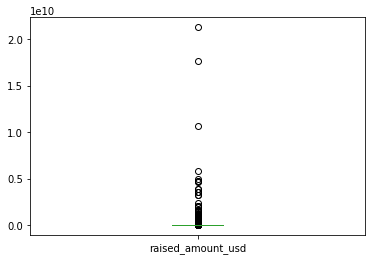

In [186]:
master_frame.raised_amount_usd.plot.box()
plt.show()

Based on the type of funding and the no of rounds some companies would have recevied investment in billions , Some in millions or less. To identify the global trends , these high values too play a role in our analysis. So , we won't be removing these values.

From the Mean Median difference and box plot , We conclude that imputing median is the best course of action to handle the null values in raised_amount_usd column.

In [187]:
#Imputing median into raised_amount_usd column's null values
master_frame['raised_amount_usd'].fillna((master_frame['raised_amount_usd'].median()), inplace=True)

In [188]:
#Verifying whether all null values are handled.
master_frame.raised_amount_usd.isnull().sum()

0

Category list and country code are Categorical variables. So, We cannot impute null values with an valid acceptable value in these columns so dropping them so that they won't affect our analysis is the best course of action.

In [189]:
#Removing entries which have null values in category_list and country_code
master_frame = master_frame[~(pd.isnull(master_frame.category_list) | pd.isnull(master_frame.country_code))]
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                4220
category_list                  0
status                         0
country_code                   0
state_code                  2213
region                      1455
city                        1452
founded_at                 16063
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         75198
funded_at                      0
raised_amount_usd              0
dtype: int64

In [190]:
#Inspecting the name column which has null value
master_frame[master_frame.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
98692,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011,/organization/tell-it-in,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,NaN,01-03-2012,25000.00


We can Impute the name from the homepage_url screen

In [191]:
master_frame.loc[master_frame['name'].isnull(),['name']]= master_frame[master_frame.name.isnull()].homepage_url.str.replace('http://','').str.replace('.com','')
master_frame.isnull().sum()

permalink                      0
name                           0
homepage_url                4220
category_list                  0
status                         0
country_code                   0
state_code                  2213
region                      1455
city                        1452
founded_at                 16063
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         75198
funded_at                      0
raised_amount_usd              0
dtype: int64

In [192]:
#Examining status column 
master_frame.status.value_counts()                         

operating    82489
acquired     11245
closed        6552
ipo           4246
Name: status, dtype: int64

I had the below observation.
Spark funds is not going to be funding closed companies , so as a business decision we can remove them.
But as per TA's answer to my question here https://learn.upgrad.com/v/course/696/question/254499 , not proceeding with this approach.

In [193]:
#master_frame = master_frame[~(master_frame.status == "closed")]

## Checkpoint 2: Funding Type Analysis

Average Values of Investments for Each of these Funding Types		

1	Average funding amount of venture type	
2	Average funding amount of angel type	
3	Average funding amount of seed type	
4	Average funding amount of private equity type	
5	Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?	


In [194]:
#Filtering the data to only consist the required fund types ["angel","seed","venture","private_equity"]
master_frame_req_fund = master_frame[master_frame.funding_round_type.isin(["angel","seed","venture","private_equity"])]

In [195]:
master_frame_req_fund.groupby(
    master_frame.funding_round_type
    ).mean().rename(columns={'raised_amount_usd':'Average_raised_amount_usd'}).style.format('${0:,.2f}')

,Average_raised_amount_usd
funding_round_type,
angel,"$1,104,671.37"
private_equity,"$65,675,408.81"
seed,"$936,291.63"
venture,"$10,910,478.17"


As Spark Funds is intereseted in investing amount between 5 to 15 million USD ,we will check which seed funding falls in range.

In [196]:
master_frame_req_fund.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000,inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

In [197]:
#Checking the spread of Venture Fundtype
master_frame_req_fund[master_frame_req_fund.funding_round_type == "venture"].quantile([0.25,0.5,0.75]).style.format('${0:,.2f}')

,raised_amount_usd
0.25,"$1,680,511.00"
0.5,"$4,200,000.00"
0.75,"$10,806,384.25"


#### Venture Funding type seems to be the best option for Spark Funds business strategy

## Checkpoint 3: Country Analysis

Analysing the Top 3 English-Speaking Countries		

1	Top English speaking country	
2	Second English speaking country	
3	Third English speaking country	


In [198]:
#Moving only the required venture data to a new data frame
venture_data = master_frame_req_fund[master_frame_req_fund.funding_round_type == "venture"]

In [199]:
#Figuring the top 9 countries which have received the largest fundings in venture in desceding order 
top9 = pd.DataFrame(venture_data.groupby(venture_data.country_code).raised_amount_usd.sum().nlargest(9).values)
top9['country_code'] = venture_data.groupby(venture_data.country_code).raised_amount_usd.sum().nlargest(9).index

In [200]:
top9 = top9.rename(columns={0:'Sum_raised_amount_usd'})

In [201]:
top9

,Sum_raised_amount_usd,country_code
0,423581977843.00,USA
1,40184215806.00,CHN
2,20449247468.00,GBR
3,14538793033.00,IND
4,9625061103.00,CAN
5,7326001501.00,FRA
6,7040887198.00,ISR
7,6674953890.00,DEU
8,3233187056.00,JPN


After studying the above data and referring to the wikipedia page provided in the assignment , following would be the answers.

1. Top English speaking country - USA
2. Second English speaking country - GBR
3. Third English speaking country - IND


## Checkpoint 4: Sector Analysis 1

In [202]:
#Splitting category_list and Creating and creating a main column
venture_data['primary_sector'] = venture_data.category_list.str.split('|',1,expand=True)[0]

In [203]:
#Reading mapping.csv
mapping=pd.read_csv('mapping.csv')

In [204]:
#Inspecting for null values
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [205]:
#Inspecting the column category_list which has null values                              
mapping[mapping.category_list.isnull()]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


By observing this record , this seems to be a dummy record so , we remove it. We can also drop the Blanks column as well. Also 
We can drop the Blanks column which is not necessary for mapping as mapping a primary sector to Blank Main Sector isn't valid.

In [206]:
mapping = mapping.drop(columns='Blanks')
mapping=mapping[~mapping.category_list.isnull()]

In [207]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [208]:
#Inspecting category list column
mapping.category_list.value_counts()

Mens Specific              1
Music Education            1
Social Media Platforms     1
Big Data A0lytics          1
Flash Storage              1
                          ..
Vending and Concessions    1
Consumer Behavior          1
Hardware + Software        1
Audio                      1
Data Centers               1
Name: category_list, Length: 687, dtype: int64

The data looks werid For example  values like Identity Ma0gement,Jour0lism,Contact Ma0gement is spelled in correct , Checking if there are any other such anomolies.

In [209]:
mapping[mapping.category_list.str.contains('0',regex=True)].category_list

20              Alter0tive Medicine
22                         A0lytics
59                Big Data A0lytics
79                Business A0lytics
89                          Can0bis
91                 Career Ma0gement
103                   Chi0 Internet
114                 Cloud Ma0gement
145               Contact Ma0gement
198        Digital Rights Ma0gement
199                  Digital Sig0ge
210              Document Ma0gement
223                Educatio0l Games
240                Energy Ma0gement
243                  Enterprise 2.0
256                 Event Ma0gement
273                          Fi0nce
274               Fi0nce Technology
275              Fi0ncial Exchanges
276               Fi0ncial Services
281                 Fleet Ma0gement
310                       Gover0nce
353              Identity Ma0gement
370            Innovation Ma0gement
372    Intellectual Asset Ma0gement
384            Investment Ma0gement
389                    IT Ma0gement
391                       Jo

After studying the above data a pattern is observed. It is understood that 0 is present where ever na is required. Seems to be a data corruption issue it is happeing at such a large scale.Correcting the data to make it proper.
Note: We must make sure Enterprise 2.0 value must stay same as before even though it has 0.

In [210]:
mapping.category_list = mapping.category_list.str.replace("0","na").replace("Enterprise 2.na","Enterprise 2.0")

In [211]:
#Making sure Enterprise 2.0 is not modified
mapping[mapping.category_list.str.contains("Enterprise 2")]

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,Enterprise 2.0,0,0,0,0,0,0,1,0


In [212]:
#Making Sure all others are modified except Enterprise 2.0
mapping[mapping.category_list.str.contains('0',regex=True)].category_list

243    Enterprise 2.0
Name: category_list, dtype: object

In [213]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


To map the each primary sector to main sector , We examine the mapping data. It's clearly a 0-1 matrix.We can reshape the data frame for easier retreival of values.In pandas inbuilt functions such as melt() or wide_to_long() cane be used to reshape the dataframe.Here we will use melt.

In [214]:
df_melted = pd.melt(mapping, id_vars=["category_list"], 
                    value_vars=['Automotive & Sports','Cleantech / Semiconductors', 'Entertainment', 'Health',
                                'Manufacturing', 'News, Search and Messaging', 'Others','Social, Finance, Analytics, Advertising'
                   ])
#Reshaped data frame would be as below
df_melted.head(10)

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [215]:
#Now we retrieve only records with value 1 which will give us the list of category_list to main_sector mappings
df_melted = df_melted[(df_melted.value == 1)]

We need to rename the category_list column in the mapping data frame.If we merge without renaming and using left_on , right_on params in merge , as there is already a category_list in our venture_data frame ,it will lead to renaming of these category_list columns as category_list_x and category_list_y.

In [216]:
df_melted=df_melted.rename(columns={'category_list':'primary_sector','variable':'main_sector'})

In [217]:
#Dropping the value column as we don't require it anymore
del df_melted['value']

In [218]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 7 to 5471
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   primary_sector  687 non-null    object
 1   main_sector     687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


Achieving the objective of this Checkpoint 4 by creating the df_venture_sector_master which is a merge of venture_data and df_melted frame derived from mapping file.

In [219]:
df_venture_sector_master = pd.merge(venture_data,df_melted,on='primary_sector',how='inner')
print("Shape is ",df_venture_sector_master.shape)
df_venture_sector_master.head()

Shape is  (51829, 18)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,Media,Entertainment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,Media,Entertainment


## Checkpoint 5: Sector Analysis 2

Aim is to create 3 data frames D1, D2 and D3

In [220]:
#Filtering the data to match investment amount requirement of spark funds.
df_venture_sector_5Mto15M_master = df_venture_sector_master[
    (df_venture_sector_master.raised_amount_usd >= 5000000) & 
    (df_venture_sector_master.raised_amount_usd <= 15000000)]

In [221]:
#Building D1,D2,D3 from df_venture_sector_5Mto15M_master using the top countries data
D1 = df_venture_sector_5Mto15M_master[df_venture_sector_5Mto15M_master.country_code == "USA"]
D2 = df_venture_sector_5Mto15M_master[df_venture_sector_5Mto15M_master.country_code == "GBR"]
D3 = df_venture_sector_5Mto15M_master[df_venture_sector_5Mto15M_master.country_code == "IND"]

In [222]:
#Calculating total count of investments for each main sector in a separate column for each data frame
D1["Investment_count"] = D1.groupby(D1.main_sector).raised_amount_usd.transform('count')
D2["Investment_count"] = D2.groupby(D2.main_sector).raised_amount_usd.transform('count')
D3["Investment_count"] = D3.groupby(D3.main_sector).raised_amount_usd.transform('count')

In [223]:
#Calculating the total amount invested in each main sector in a separate column
D1["Total_investment"] = D1.groupby(D1.main_sector).raised_amount_usd.transform('sum')
D2["Total_investment"] = D2.groupby(D2.main_sector).raised_amount_usd.transform('sum')
D3["Total_investment"] = D3.groupby(D3.main_sector).raised_amount_usd.transform('sum')

In [224]:
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,Investment_count,Total_investment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,Media,Entertainment,591,5099197982.00
16,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,Media,Entertainment,591,5099197982.00
25,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,Media,Entertainment,591,5099197982.00
26,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,Media,Entertainment,591,5099197982.00
36,/organization/matchmine,matchmine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,Media,Entertainment,591,5099197982.00


In [225]:
D2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,Investment_count,Total_investment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,Media,Entertainment,56,482784687.00
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,Media,Entertainment,56,482784687.00
96,/organization/common-interest-communities,common interest communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.00,Application Platforms,"News, Search and Messaging",73,615746235.00
111,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.00,Application Platforms,"News, Search and Messaging",73,615746235.00
112,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.00,Application Platforms,"News, Search and Messaging",73,615746235.00


In [226]:
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,Investment_count,Total_investment
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media,Entertainment,33,280830000.00
256,/organization/babajob,babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.00,Curated Web,"News, Search and Messaging",52,433834545.00
282,/organization/bharat-matrimony,bharat matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.00,Curated Web,"News, Search and Messaging",52,433834545.00
314,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.00,Curated Web,"News, Search and Messaging",52,433834545.00
316,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.00,Curated Web,"News, Search and Messaging",52,433834545.00


Total number of Investments (count) in C1 , C2 , C3


In [227]:
print("In C1 Investments count is ",D1.shape[0])
print("In C2 Investments count is ",D2.shape[0])
print("In C3 Investments count is ",D3.shape[0])

In C1 Investments count is  12012
In C2 Investments count is  619
In C3 Investments count is  328


Total amount of investment (USD)

In [228]:
print("In C1 Total amount of investment (USD) is ",D1.raised_amount_usd.sum())
print("In C2 Total amount of investment (USD) is ",D2.raised_amount_usd.sum())
print("In C3 Total amount of investment (USD) ",D3.raised_amount_usd.sum())

In C1 Total amount of investment (USD) is  107318294664.0
In C2 Total amount of investment (USD) is  5365228300.0
In C3 Total amount of investment (USD)  2949543602.0


Top Sector name (no. of investment-wise)

In [229]:
D1_top_sector = D1.groupby(D1.main_sector).Investment_count.value_counts().nlargest(3).index[0][0]
D2_top_sector = D2.groupby(D2.main_sector).Investment_count.value_counts().nlargest(3).index[0][0]
D3_top_sector = D3.groupby(D3.main_sector).Investment_count.value_counts().nlargest(3).index[0][0]

print("In C1 Top Sector name (no. of investment-wise) is ",D1_top_sector)
print("In C2 Top Sector name (no. of investment-wise) is ",D2_top_sector)
print("In C3 Top Sector name (no. of investment-wise) is ",D3_top_sector)

In C1 Top Sector name (no. of investment-wise) is  Others
In C2 Top Sector name (no. of investment-wise) is  Others
In C3 Top Sector name (no. of investment-wise) is  Others


Second Sector name (no. of investment-wise)

In [230]:
D1_2nd_top_sector = D1.groupby(D1.main_sector).Investment_count.value_counts().nlargest(3).index[1][0]
D2_2nd_top_sector = D2.groupby(D2.main_sector).Investment_count.value_counts().nlargest(3).index[1][0]
D3_2nd_top_sector = D3.groupby(D3.main_sector).Investment_count.value_counts().nlargest(3).index[1][0]

print("In C1 Second Sector name (no. of investment-wise) is ",D1_2nd_top_sector)
print("In C2 Second Sector name (no. of investment-wise) is ",D2_2nd_top_sector)
print("In C3 Second Sector name (no. of investment-wise) is ",D3_2nd_top_sector)

In C1 Second Sector name (no. of investment-wise) is  Social, Finance, Analytics, Advertising
In C2 Second Sector name (no. of investment-wise) is  Social, Finance, Analytics, Advertising
In C3 Second Sector name (no. of investment-wise) is  Social, Finance, Analytics, Advertising


Third Sector name (no. of investment-wise)

In [231]:
D1_3rd_top_sector = D1.groupby(D1.main_sector).Investment_count.value_counts().nlargest(3).index[2][0]
D2_3rd_top_sector = D2.groupby(D2.main_sector).Investment_count.value_counts().nlargest(3).index[2][0]
D3_3rd_top_sector = D3.groupby(D3.main_sector).Investment_count.value_counts().nlargest(3).index[2][0]

print("In C1 Third Sector name (no. of investment-wise) is ",D1_3rd_top_sector)
print("In C2 Third Sector name (no. of investment-wise) is ",D2_3rd_top_sector)
print("In C3 Third Sector name (no. of investment-wise) is ",D3_3rd_top_sector)

In C1 Third Sector name (no. of investment-wise) is  Cleantech / Semiconductors
In C2 Third Sector name (no. of investment-wise) is  Cleantech / Semiconductors
In C3 Third Sector name (no. of investment-wise) is  News, Search and Messaging


Number of investments in top sector for each of the top 3 countries

In [232]:
print("In C1 Number of investments in top sector is ",D1[D1.main_sector == D1_top_sector].count()[0])
print("In C2 Number of investments in top sector is ",D2[D2.main_sector == D2_top_sector].count()[0])
print("In C3 Number of investments in top sector is ",D3[D3.main_sector == D3_top_sector].count()[0])

In C1 Number of investments in top sector is  2950
In C2 Number of investments in top sector is  147
In C3 Number of investments in top sector is  110


Number of investments in 2nd top sector for each of the top 3 countries

In [233]:
print("In C1 Number of investments in 2nd top sector  is ",D1[D1.main_sector == D1_2nd_top_sector].count()[0])
print("In C2 Number of investments in 2nd top sector  is ",D2[D2.main_sector == D2_2nd_top_sector].count()[0])
print("In C3 Number of investments in 2nd top sector  is ",D3[D3.main_sector == D3_2nd_top_sector].count()[0])

In C1 Number of investments in 2nd top sector  is  2714
In C2 Number of investments in 2nd top sector  is  133
In C3 Number of investments in 2nd top sector  is  60


Number of investments in 3rd top sector for each of the top 3 countries

In [234]:
print("In C1 Number of investments in 3rd top sector  is ",D1[D1.main_sector == D1_3rd_top_sector].count()[0])
print("In C2 Number of investments in 3rd top sector  is ",D2[D2.main_sector == D2_3rd_top_sector].count()[0])
print("In C3 Number of investments in 3rd top sector  is ",D3[D3.main_sector == D3_3rd_top_sector].count()[0])

In C1 Number of investments in 3rd top sector  is  2300
In C2 Number of investments in 3rd top sector  is  128
In C3 Number of investments in 3rd top sector  is  52


For point 3 (top sector count-wise), which company received the highest investment?

We are grouping based on permalink as companies may have recevied fundings multpile times in various rounds. Using this we can find the companies which have received the highest funding in all the rounds combined.

In [235]:
print(D1[(D1.main_sector == D1_top_sector)].groupby("permalink").raised_amount_usd.sum().nlargest().index[0].split("/")[-1])
print(D2[(D2.main_sector == D2_top_sector)].groupby("permalink").raised_amount_usd.sum().nlargest().index[0].split("/")[-1])
print(D3[(D3.main_sector == D3_top_sector)].groupby("permalink").raised_amount_usd.sum().nlargest().index[0].split("/")[-1])

virtustream
electric-cloud
firstcry-com


For point 4 (second best sector count-wise), which company received the highest investment?

In [236]:
print(D1[(D1.main_sector == D1_2nd_top_sector)].groupby("permalink").raised_amount_usd.sum().nlargest().index[0].split("/")[-1])
print(D2[(D2.main_sector == D2_2nd_top_sector)].groupby("permalink").raised_amount_usd.sum().nlargest().index[0].split("/")[-1])
print(D3[(D3.main_sector == D3_2nd_top_sector)].groupby("permalink").raised_amount_usd.sum().nlargest().index[0].split("/")[-1])

shotspotter
celltick-technologies
manthan-systems


## Checkpoint 6: Plots

####  A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [237]:
#To center the graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

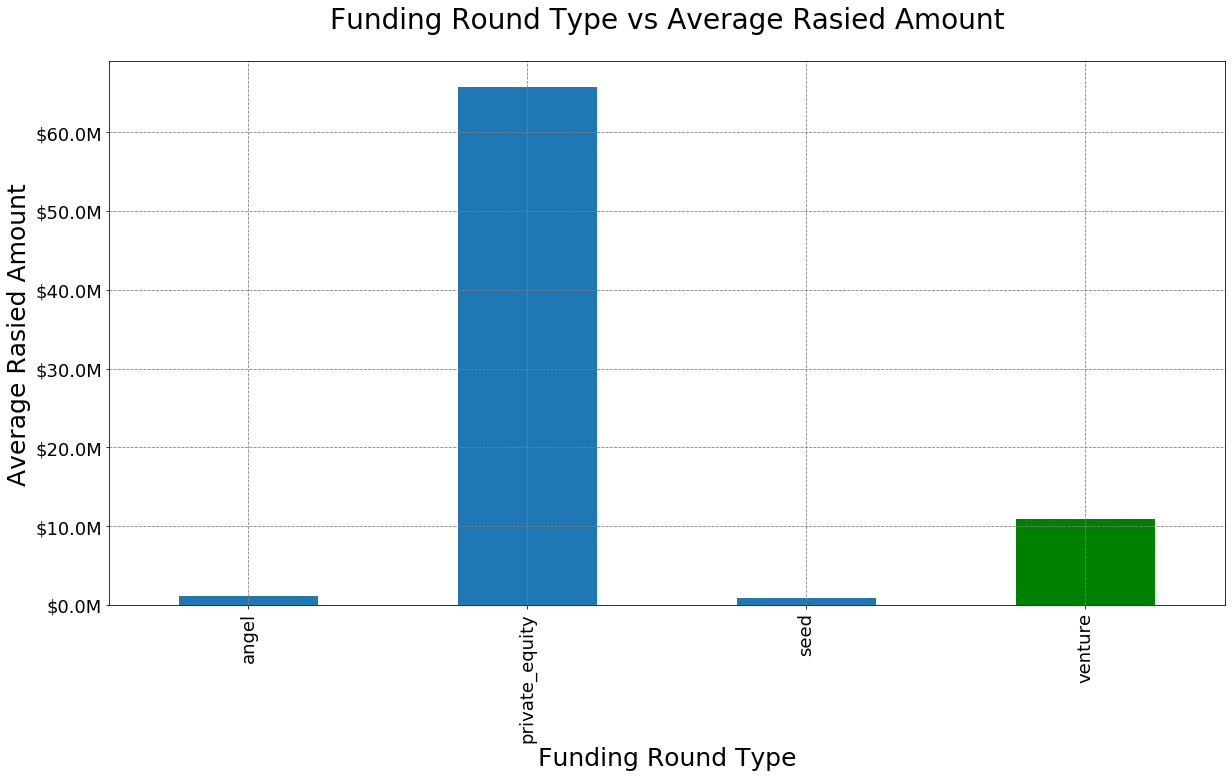

In [238]:
ax1 = master_frame_req_fund.groupby('funding_round_type')['raised_amount_usd'].mean().plot.bar(
figsize=(20, 10),
fontsize=18,
)
ax1.set_ylabel("Average Rasied Amount",fontsize=25)
ax1.set_xlabel("Funding Round Type",fontsize=25)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${}'.format(x/1000000) + 'M'))
plt.grid(color='gray', linestyle='dashed')
plt.title("Funding Round Type vs Average Rasied Amount",fontsize=28).set_position([.5, 1.05])
ax1.patches[master_frame_req_fund.index.get_indexer(['venture'])[0]].set_facecolor('g')
plt.show()

From the above graph It can be deduced that for the Spark funds business requirement to invest in a fundtype between 5M to 15M , It is showcased in graph that most investors in this range have invested in fund type "VENTURE".

Lets check what percentage of investors investing in 5M to 15M range have invested in our target fund type VENTURE.

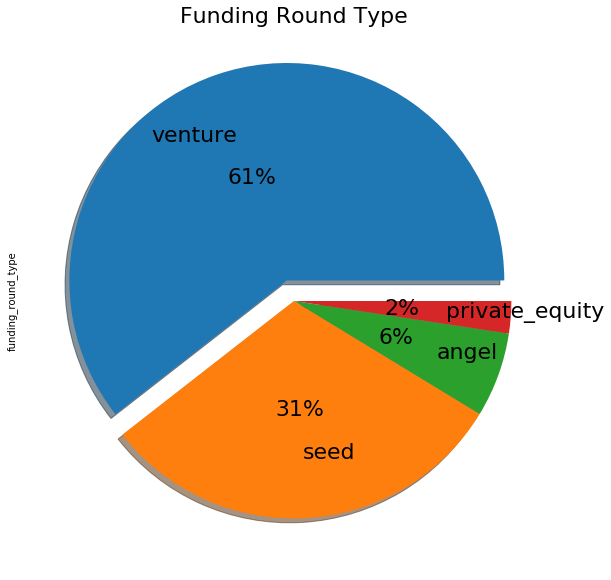

In [239]:
plt.figure(figsize=[10,5])
explode = (0.1,0,0,0)
ax2 = master_frame_req_fund.funding_round_type.value_counts().plot.pie(
autopct='%1.0f%%', 
pctdistance=0.5, 
labeldistance=0.7,
figsize=(20, 10),
fontsize=22,
explode=explode,
shadow=True
)
plt.title("Funding Round Type",fontsize=22)
plt.show()

The above pie chart shows that in the range of 5M to 15M 61% of the investors have invested in "VENTURE" fund type.

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

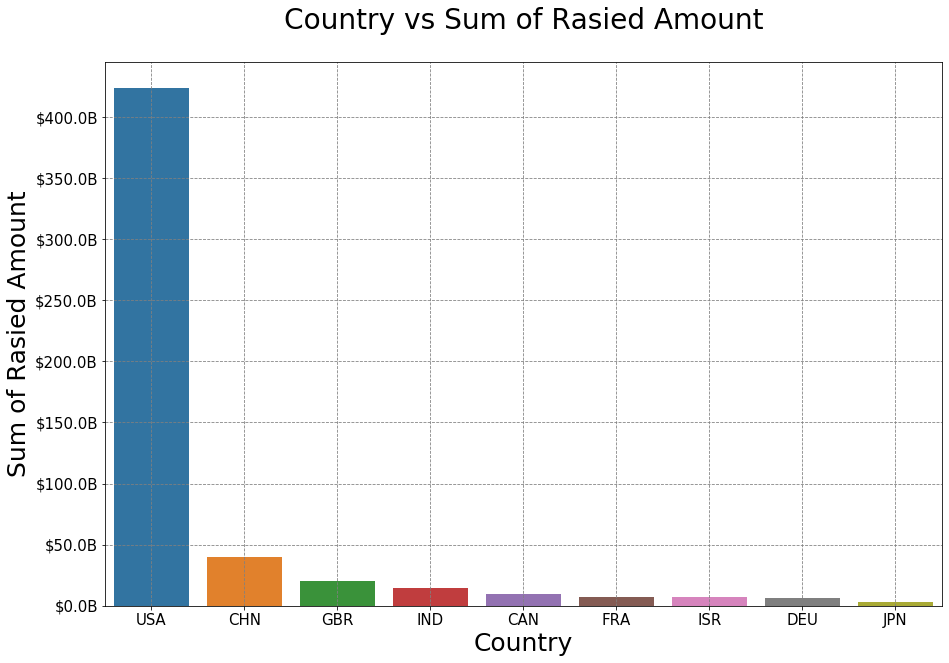

In [240]:
plt.figure(figsize=(15, 10))
ax3 = sns.barplot(
data=top9,
x='country_code',
y='Sum_raised_amount_usd',
)
ax3.set_ylabel("Sum of Rasied Amount",fontsize=25)
ax3.set_xlabel("Country",fontsize=25)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${}'.format(x/1000000000) + 'B'))
plt.grid(color='gray', linestyle='dashed')
plt.title("Country vs Sum of Rasied Amount",fontsize=28).set_position([.5, 1.05])
ax3.tick_params(axis="x", labelsize=15)
ax3.tick_params(axis="y", labelsize=15)
plt.show()

With an overwhelming investment of more that 400 billion dolalrs USA is the top country to invest in followed by Great Britan(GBR) and India(IND).

Note: China(CHN) ignored as it as non English speaking country which doesn't satifsy spark funds business requirement.

#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [241]:
# We have already dervied the top 3 countries data sets in D1,D2,D3 in pervious section.
# From those dataframes we filter the data only till the top 3rd sector.
x1 = D1[D1.Investment_count >= D1[D1.main_sector == D1_3rd_top_sector].count()[0]]
x2 = D2[D2.Investment_count >= D2[D2.main_sector == D2_3rd_top_sector].count()[0]]
x3 = D3[D3.Investment_count >= D3[D3.main_sector == D3_3rd_top_sector].count()[0]]

In [242]:
#Creating a pivot table as multi column comparision is required.
top3_plot = pd.pivot_table(data=pd.concat([x1,x2,x3]),values="raised_amount_usd",index="country_code",columns="main_sector",aggfunc=len)

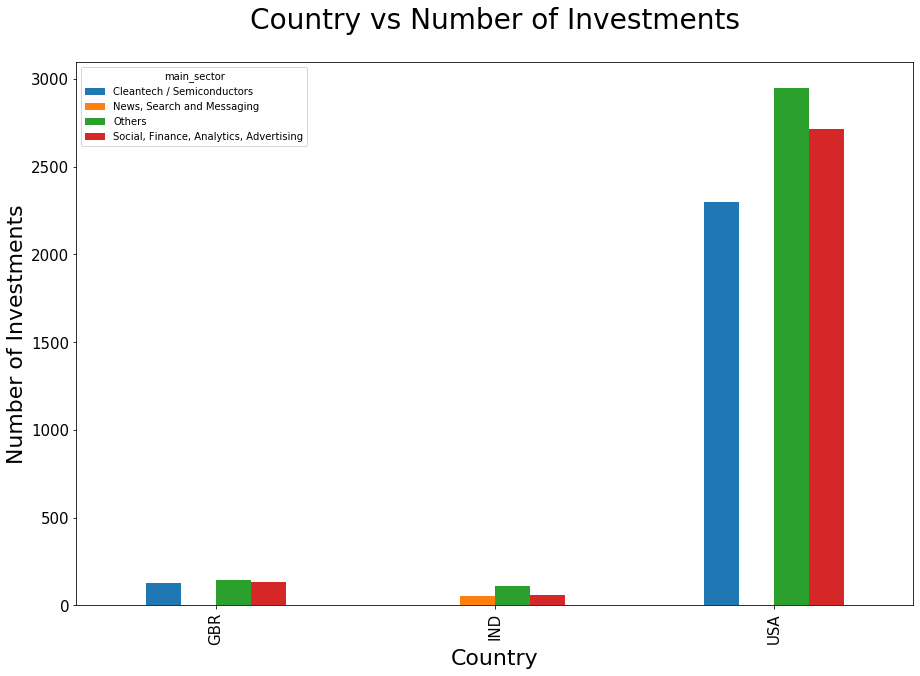

In [243]:
ax4 = top3_plot.plot(kind="bar",figsize=[15,10])
ax4.set_ylabel("Number of Investments",fontsize=22)
ax4.set_xlabel("Country",fontsize=22)
plt.title("Country vs Number of Investments",fontsize=28).set_position([.5, 1.05])
ax4.tick_params(axis="x", labelsize=15)
ax4.tick_params(axis="y", labelsize=15)
plt.show()

From the Above Graph it is concluded that most investors within the range of 5M to 15M are investing in USA in the sectors 'Others','Social, Finance, Analytics, Advertising' and "Cleantech / Semiconductors"